In [1]:
import pandas as pd 
import sys 
sys.path.append('/Users/gracecolverd/New_dataset')
from src.post_process import * 


In [2]:
lk= pd.read_csv('/Volumes/T9/Data_downloads/lookups/pcs_to_oa_mapping_census2021/PCD_OA21_LSOA21_MSOA21_LAD_AUG23_UK_LU.csv', encoding='latin1')  

/var/folders/n5/_2d3c5sd5j3810327mknn0sh0000gn/T/ipykernel_26339/2738763796.py:1: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  lk= pd.read_csv('/Volumes/T9/Data_downloads/lookups/pcs_to_oa_mapping_census2021/PCD_OA21_LSOA21_MSOA21_LAD_AUG23_UK_LU.csv', encoding='latin1')


In [3]:
# post process raw fuel proc data 
fold = '/Volumes/T9/Data_downloads/new-data-outputs/proc_dir (2)/fuel'

df_raw = load_from_log(load_proc_dir_log_file(fold))
df_proc, fuel = post_proc_new_fuel(df_raw)

In [4]:
# age is proc in postcode_attrs/post_process_age.ipynb 
age = pd.read_csv('/Volumes/T9/Data_downloads/new-data-outputs/ml_input/age_results_V2.csv') 

In [23]:
# tempdata 
ll=[]
fold = '/Volumes/T9/Data_downloads/new-data-outputs/temp_data/*.csv'
for f in glob.glob(fold):
    d = pd.read_csv(f)
    ll.append(d)
temp = pd.concat(ll)

In [5]:
len(fuel), len(df_proc)

(685276, 1610937)

In [6]:
res_df = df_proc[df_proc['percent_residential']==1]

cl_res = res_df[res_df['diff_gas_meters_uprns_res']<=40 ]

cl = deal_unknown_res(cl_res)

/Users/gracecolverd/New_dataset/src/post_process.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['unkn_res'] = data['all_res_total_buildings'] - data['clean_res_total_buildings'] - data['outb_res_total_buildings']
/Users/gracecolverd/New_dataset/src/post_process.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['perc_unk_res'] = data['unkn_res'] / data['all_res_total_buildings'] * 100
/Users/gracecolverd/New_dataset/src/post_process.py:191: SettingWithCopyWarning: 
A value is trying to b

In [7]:
cl 

,postcode,all_types_total_buildings,all_types_uprn_count_total,comm_alltypes_count,unknown_alltypes,all_res_total_buildings,all_res_premise_area_total,all_res_gross_area_total,all_res_heated_vol_fc_total,all_res_heated_vol_h_total,...,max_gas_per_vol,perc_all_res,perc_clean_res,perc_all_res_basement,perc_all_res_listed,max_vol_per_uprn,min_vol_per_uprn,diff_gas_meters_uprns_res,unkn_res,perc_unk_res
7,PL6 7LP,46.0,27.0,0.0,0.0,46.0,2730.499987,5577.799982,5577.799971,5245.795845,...,61.077027,1.0,0.782609,0.0,0.00,196.381480,184.085031,0.000000,0.0,0.0
10,PL4 9PS,22.0,23.0,0.0,0.0,22.0,1391.699991,2777.499994,2777.499979,2701.353928,...,53.768039,1.0,0.681818,0.0,0.00,116.539130,113.228432,4.545455,0.0,0.0
12,PL1 3DT,2.0,18.0,0.0,0.0,2.0,788.899979,3155.599915,3155.599915,2749.040914,...,39.596955,1.0,1.000000,0.0,0.00,175.311106,152.724495,0.000000,0.0,0.0
13,PL4 8PB,2.0,12.0,0.0,0.0,2.0,331.000000,772.299988,772.300003,702.426735,...,149.419917,1.0,1.000000,0.0,0.00,64.358334,58.535561,20.000000,0.0,0.0
14,PL4 8PE,19.0,23.0,0.0,0.0,19.0,739.699988,2223.800025,2223.799963,1914.774575,...,63.454501,1.0,0.736842,0.0,0.00,95.256520,81.820634,21.052632,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9967,DL12 8GP,4.0,30.0,0.0,0.0,4.0,1864.299957,7320.899963,7320.899811,7298.304365,...,41.609452,1.0,1.000000,0.0,0.25,244.029994,243.276812,3.448276,0.0,0.0
9972,TS6 0BU,65.0,38.0,0.0,0.0,65.0,2737.799991,4975.699981,4975.699981,5017.027078,...,89.023167,1.0,0.600000,0.0,0.00,118.871765,117.784210,0.000000,0.0,0.0
9974,DL12 8BL,2.0,4.0,0.0,0.0,2.0,636.799988,1910.400024,1910.399963,1933.852204,...,63.816138,1.0,1.000000,0.0,0.00,483.463051,477.599991,33.333333,0.0,0.0
9984,DL12 8LJ,8.0,21.0,0.0,0.0,8.0,935.100006,1870.200012,1870.200012,1877.419173,...,129.541120,1.0,1.000000,0.0,0.00,89.400913,89.057143,5.000000,0.0,0.0


In [8]:
cl

,postcode,all_types_total_buildings,all_types_uprn_count_total,comm_alltypes_count,unknown_alltypes,all_res_total_buildings,all_res_premise_area_total,all_res_gross_area_total,all_res_heated_vol_fc_total,all_res_heated_vol_h_total,...,max_gas_per_vol,perc_all_res,perc_clean_res,perc_all_res_basement,perc_all_res_listed,max_vol_per_uprn,min_vol_per_uprn,diff_gas_meters_uprns_res,unkn_res,perc_unk_res
7,PL6 7LP,46.0,27.0,0.0,0.0,46.0,2730.499987,5577.799982,5577.799971,5245.795845,...,61.077027,1.0,0.782609,0.0,0.00,196.381480,184.085031,0.000000,0.0,0.0
10,PL4 9PS,22.0,23.0,0.0,0.0,22.0,1391.699991,2777.499994,2777.499979,2701.353928,...,53.768039,1.0,0.681818,0.0,0.00,116.539130,113.228432,4.545455,0.0,0.0
12,PL1 3DT,2.0,18.0,0.0,0.0,2.0,788.899979,3155.599915,3155.599915,2749.040914,...,39.596955,1.0,1.000000,0.0,0.00,175.311106,152.724495,0.000000,0.0,0.0
13,PL4 8PB,2.0,12.0,0.0,0.0,2.0,331.000000,772.299988,772.300003,702.426735,...,149.419917,1.0,1.000000,0.0,0.00,64.358334,58.535561,20.000000,0.0,0.0
14,PL4 8PE,19.0,23.0,0.0,0.0,19.0,739.699988,2223.800025,2223.799963,1914.774575,...,63.454501,1.0,0.736842,0.0,0.00,95.256520,81.820634,21.052632,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9967,DL12 8GP,4.0,30.0,0.0,0.0,4.0,1864.299957,7320.899963,7320.899811,7298.304365,...,41.609452,1.0,1.000000,0.0,0.25,244.029994,243.276812,3.448276,0.0,0.0
9972,TS6 0BU,65.0,38.0,0.0,0.0,65.0,2737.799991,4975.699981,4975.699981,5017.027078,...,89.023167,1.0,0.600000,0.0,0.00,118.871765,117.784210,0.000000,0.0,0.0
9974,DL12 8BL,2.0,4.0,0.0,0.0,2.0,636.799988,1910.400024,1910.399963,1933.852204,...,63.816138,1.0,1.000000,0.0,0.00,483.463051,477.599991,33.333333,0.0,0.0
9984,DL12 8LJ,8.0,21.0,0.0,0.0,8.0,935.100006,1870.200012,1870.200012,1877.419173,...,129.541120,1.0,1.000000,0.0,0.00,89.400913,89.057143,5.000000,0.0,0.0


In [63]:
fold='/Volumes/T9/Data_downloads/new-data-outputs/proc_dir (2)/type'
atyp =  load_from_log(load_proc_dir_log_file(fold) )
atyp = validate_and_calculate_percentages_type(atyp)
typed_data = atyp[['postcode'] + [col for col in atyp if '_pct' in col ]].copy() 


data = fuel.merge(typed_data, on=['postcode'])
data2 = data.merge(age, on=['postcode', 'region'])

data3 = data2.merge(temp, left_on='postcode', right_on='POSTCODE')


postcode_area = pd.read_csv('/Users/gracecolverd/New_dataset/postcode_attrs/postcode_areas.csv') 
data4 = data3.merge(postcode_area, on='POSTCODE')


data4['postcode_density'] = data4['all_res_premise_area_total'] / data4['postcode_area']
data4['log_pc_area'] = np.log(data4.postcode_area)
data4['log_all_types_total_buildings'] = np.log(data4['all_types_total_buildings'])
len(data4), len(fuel)

(685276, 685276)

In [21]:
len(age), len(fuel), len(data), len(data2)

(1610937, 685276, 685276, 685276)

In [64]:
data4.columns.tolist()

['postcode',
 'all_types_total_buildings',
 'all_types_uprn_count_total',
 'comm_alltypes_count',
 'unknown_alltypes',
 'all_res_total_buildings',
 'all_res_premise_area_total',
 'all_res_gross_area_total',
 'all_res_heated_vol_fc_total',
 'all_res_heated_vol_h_total',
 'all_res_base_floor_total',
 'all_res_basement_heated_vol_max_total',
 'all_res_listed_bool_total',
 'all_res_uprn_count_total',
 'clean_res_total_buildings',
 'clean_res_premise_area_total',
 'clean_res_gross_area_total',
 'clean_res_heated_vol_fc_total',
 'clean_res_heated_vol_h_total',
 'clean_res_base_floor_total',
 'clean_res_basement_heated_vol_max_total',
 'clean_res_listed_bool_total',
 'clean_res_uprn_count_total',
 'outb_res_total_buildings',
 'outb_res_premise_area_total',
 'outb_res_gross_area_total',
 'outb_res_heated_vol_fc_total',
 'outb_res_heated_vol_h_total',
 'outb_res_base_floor_total',
 'outb_res_basement_heated_vol_max_total',
 'outb_res_listed_bool_total',
 'outb_res_uprn_count_total',
 'mixed_tot

In [65]:
data4.groupby('region').count()

,postcode,all_types_total_buildings,all_types_uprn_count_total,comm_alltypes_count,unknown_alltypes,all_res_total_buildings,all_res_premise_area_total,all_res_gross_area_total,all_res_heated_vol_fc_total,all_res_heated_vol_h_total,...,HDD_summer,CDD_summer,HDD_winter,CDD_winter,index,POSTCODE,postcode_area,postcode_density,log_pc_area,log_all_types_total_buildings
region,,,,,,,,,,,,,,,,,,,,,
EE,60049,60049,60049,60049,60049,60049,60049,60045,59649,59982,...,60049,60049,60049,60049,60049,60049,60049,60049,60049,60049
EM,48500,48500,48500,48500,48500,48500,48500,48500,48271,48444,...,48500,48500,48500,48500,48500,48500,48500,48500,48500,48500
LN,64590,64590,64590,64590,64590,64590,64590,64585,62031,64124,...,64590,64590,64590,64590,64590,64590,64590,64590,64590,64590
NE,37660,37660,37660,37660,37660,37660,37660,37659,36630,37633,...,37660,37660,37660,37660,37660,37660,37660,37660,37660,37660
NW,94105,94105,94105,94105,94105,94105,94105,94105,93403,94011,...,94105,94105,94105,94105,94105,94105,94105,94105,94105,94105
SC,63861,63861,63861,63861,63861,63861,63861,63861,63394,63792,...,63861,63861,63861,63861,63861,63861,63861,63861,63861,63861
SE,102463,102463,102463,102463,102463,102463,102463,102450,101493,102301,...,102463,102463,102463,102463,102463,102463,102463,102463,102463,102463
SW,59359,59359,59359,59359,59359,59359,59359,59359,58827,59304,...,59359,59359,59359,59359,59359,59359,59359,59359,59359,59359
WA,31097,31097,31097,31097,31097,31097,31097,31097,30887,31059,...,31097,31097,31097,31097,31097,31097,31097,31097,31097,31097


In [ ]:
data4

In [82]:
# census 
census  = glob.glob('/Users/gracecolverd/New_dataset/data/census_attrs/*csv')
ll=pd.DataFrame()
i = 0
for f in census:
    print(f)
    df = pd.read_csv(f)
    if i ==0:
        res = df.copy()     
    else:
        res = df.merge(res, on='Output Areas Code', how='outer')


[       Output Areas Code  economic_activity_perc_Does not apply  \
 0              E00000001                               0.085227   
 1              E00000003                               0.138996   
 2              E00000005                               0.062500   
 3              E00000007                               0.034014   
 4              E00000010                               0.039548   
 ...                  ...                                    ...   
 188875         W00010693                               0.001351   
 188876         W00010694                               0.248756   
 188877         W00010695                               0.209184   
 188878         W00010696                               0.239130   
 188879         W00010697                               0.188192   
 
         economic_activity_perc_Economically active (excluding full-time students): In employment: Employee: Part-time  \
 0                                                0.096591  

In [70]:
oa_lk = pd.read_csv('/Volumes/T9/Data_downloads/lookups/oa11_to_oa21/Output_Areas_(2011)_to_Output_Areas_(2021)_to_Local_Authority_District_(2022)_Lookup_in_England_and_Wales_(Version_2).csv')

/var/folders/n5/_2d3c5sd5j3810327mknn0sh0000gn/T/ipykernel_26339/2961499621.py:1: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  oa_lk = pd.read_csv('/Volumes/T9/Data_downloads/lookups/oa11_to_oa21/Output_Areas_(2011)_to_Output_Areas_(2021)_to_Local_Authority_District_(2022)_Lookup_in_England_and_Wales_(Version_2).csv')


In [69]:
u_r =  pd.read_csv('/Volumes/T9/Data_downloads/rural_urban/RUC11_OA11_EW.csv')

In [72]:
oa_lk.head()

,ObjectId,OA11CD,OA21CD,LAD22CD,LAD22NM,LAD22NMW
0,1,E00000001,E00000001,E09000001,City of London,NaN
1,2,E00000003,E00000003,E09000001,City of London,NaN
2,3,E00000005,E00000005,E09000001,City of London,NaN
3,4,E00000007,E00000007,E09000001,City of London,NaN
4,5,E00000010,E00000010,E09000001,City of London,NaN


In [74]:
cen_lk = census_df.merge(oa_lk, left_on = 'Output Areas Code', right_on ='OA21CD')
len(census_df) , len(cen_lk)


(2266560, 2176896)

In [77]:
cen_ur = cen_lk.merge(u_r, on = 'OA11CD', how='inner')

In [78]:
len(census_df), len(u_r) , len(cen_ur)

(2266560, 181408, 2176896)

In [81]:
census_df.groupby('Output Areas Code').count()

,economic_activity_perc_Does not apply,economic_activity_perc_Economically active (excluding full-time students): In employment: Employee: Part-time,economic_activity_perc_Economically active (excluding full-time students): In employment: Employee: Full-time,economic_activity_perc_Economically active (excluding full-time students): In employment: Self-employed with employees: Part-time,economic_activity_perc_Economically active (excluding full-time students): In employment: Self-employed with employees: Full-time,economic_activity_perc_Economically active (excluding full-time students): In employment: Self-employed without employees: Part-time,economic_activity_perc_Economically active (excluding full-time students): In employment: Self-employed without employees: Full-time,economic_activity_perc_Economically active (excluding full-time students): Unemployed: Seeking work or waiting to start a job already obtained: Available to start working within 2 weeks,economic_activity_perc_Economically active and a full-time student: In employment: Employee: Part-time,economic_activity_perc_Economically active and a full-time student: In employment: Employee: Full-time,...,central_heating_perc_Tank or bottled gas only,central_heating_perc_Electric only,central_heating_perc_Oil only,central_heating_perc_Wood only,central_heating_perc_Solid fuel only,central_heating_perc_Renewable energy only,central_heating_perc_District or communal heat networks only,central_heating_perc_Other central heating only,central_heating_perc_Two or more types of central heating (not including renewable energy),central_heating_perc_Two or more types of central heating (including renewable energy)
Output Areas Code,,,,,,,,,,,,,,,,,,,,,
E00000001,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
E00000003,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
E00000005,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
E00000007,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
E00000010,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
W00010693,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
W00010694,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
W00010695,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [ ]:
# ml = pd.read_csv('/Volumes/T9/Data_downloads/new-data-outputs/ml_input/V2_ml_input_data.csv')
# ml = pd.read_csv('/Volumes/T9/Data_downloads/new-data-outputs/ml_input/V3_ml_input_data.csv')

# create clean census data
import pandas as pd 
ml= pd.read_csv('/Volumes/T9/Data_downloads/new-data-outputs/ml_input/V3.2_region_geoms.csv')

/var/folders/n5/_2d3c5sd5j3810327mknn0sh0000gn/T/ipykernel_11216/2763905437.py:6: DtypeWarning: Columns (142) have mixed types. Specify dtype option on import or set low_memory=False.
  ml= pd.read_csv('/Volumes/T9/Data_downloads/new-data-outputs/ml_input/V3.2_region_geoms.csv')


In [ ]:
ml.to_csv('/Volumes/T9/Data_downloads/new-data-outputs/ml_input/V3.3_region_geoms.csv', index=False)

In [ ]:
ml.all_types_total_buildings.describe()

count    515309.000000
mean         21.415417
std          15.394690
min           2.000000
25%          10.000000
50%          17.000000
75%          29.000000
max         164.000000
Name: all_types_total_buildings, dtype: float64

In [ ]:
ml.log_all_types_total_buildings.describe()

count    515309.000000
mean          2.794333
std           0.779070
min           0.693147
25%           2.302585
50%           2.833213
75%           3.367296
max           5.099866
Name: log_all_types_total_buildings, dtype: float64

In [ ]:
cv = pd.read_csv('/Volumes/T9/Data_downloads/new-data-outputs/ml_input/v6_census.csv' )

/var/folders/n5/_2d3c5sd5j3810327mknn0sh0000gn/T/ipykernel_6486/3439035489.py:1: DtypeWarning: Columns (141,171) have mixed types. Specify dtype option on import or set low_memory=False.
  cv = pd.read_csv('/Volumes/T9/Data_downloads/new-data-outputs/ml_input/v6_census.csv' )


In [ ]:
cv.columns.tolist()

['Unnamed: 0',
 'postcode',
 'all_types_total_buildings',
 'all_types_uprn_count_total',
 'comm_alltypes_count',
 'unknown_alltypes',
 'all_res_total_buildings',
 'all_res_premise_area_total',
 'all_res_gross_area_total',
 'all_res_heated_vol_fc_total',
 'all_res_heated_vol_h_total',
 'all_res_base_floor_total',
 'all_res_basement_heated_vol_max_total',
 'all_res_listed_bool_total',
 'all_res_uprn_count_total',
 'clean_res_total_buildings',
 'clean_res_premise_area_total',
 'clean_res_gross_area_total',
 'clean_res_heated_vol_fc_total',
 'clean_res_heated_vol_h_total',
 'clean_res_base_floor_total',
 'clean_res_basement_heated_vol_max_total',
 'clean_res_listed_bool_total',
 'clean_res_uprn_count_total',
 'outb_res_total_buildings',
 'outb_res_premise_area_total',
 'outb_res_gross_area_total',
 'outb_res_heated_vol_fc_total',
 'outb_res_heated_vol_h_total',
 'outb_res_base_floor_total',
 'outb_res_basement_heated_vol_max_total',
 'outb_res_listed_bool_total',
 'outb_res_uprn_count_tota

In [ ]:
cv[cv['ladcd_x']!= cv['ladcd_y']][['ladcd_x', 'ladcd_y']]

,ladcd_x,ladcd_y
217045,E09000018,E09000027


In [ ]:
cv.rename(columns={'ladcd_y':'ladcd'}, inplace=True)

In [ ]:
cv.to_csv('/Volumes/T9/Data_downloads/new-data-outputs/ml_input/v6_census.csv', index=False)    

In [ ]:
# add pc geoms to ndvi data 
nd = pd.read_csv('/Volumes/T9/Data_downloads/new-data-outputs/ml_input/V4_fullndvi.csv')
pc_ar = pd.read_csv('/Volumes/T9/Data_downloads/new-data-outputs/ml_input/postcode_shapefile_areas.csv') 

data= nd.merge(pc_ar, on='postcode', how='inner')

data['postcode_area'] = data['area']
data['postcode_density'] = data['clean_res_premise_area_total'] / data['area']
# cap desnity at 1 if higher than 
data['postcode_density'] = np.where(data['postcode_density']> 1, 1, data['postcode_density'])
data.drop(columns=['Unnamed: 0', 'Unnamed: 0.1', 'file'], inplace=True )
data.to_csv('V4.2_ndvi_inc_geoms.csv')

In [ ]:
# // add pc ddensity to main ml 3

pc_area = pd.read_csv('/Volumes/T9/Data_downloads/new-data-outputs/ml_input/postcode_shapefile_areas.csv')
print(len(ml), len(pc_area) )
ml = ml.merge(pc_area,  on='postcode' ) 

ml['postcode_area'] = ml['area']
ml['postcode_density'] = ml['clean_res_premise_area_total'] / ml['area']
# cap desnity at 1 if higher than 
ml['postcode_density'] = np.where(ml['postcode_density']> 1, 1, ml['postcode_density'])

ml.to_csv('V5_ml_input_inc_pcgeom.csv')

NameError: name 'ml' is not defined

In [ ]:
import pandas as pd
v6 = pd.read_csv('/Volumes/T9/Data_downloads/new-data-outputs/ml_input/V6_census.csv')   

/var/folders/n5/_2d3c5sd5j3810327mknn0sh0000gn/T/ipykernel_6486/1491001811.py:2: DtypeWarning: Columns (141,171) have mixed types. Specify dtype option on import or set low_memory=False.
  v6 = pd.read_csv('/Volumes/T9/Data_downloads/new-data-outputs/ml_input/V6_census.csv')


In [ ]:
v6.columns.tolist() 

['Unnamed: 0',
 'postcode',
 'all_types_total_buildings',
 'all_types_uprn_count_total',
 'comm_alltypes_count',
 'unknown_alltypes',
 'all_res_total_buildings',
 'all_res_premise_area_total',
 'all_res_gross_area_total',
 'all_res_heated_vol_fc_total',
 'all_res_heated_vol_h_total',
 'all_res_base_floor_total',
 'all_res_basement_heated_vol_max_total',
 'all_res_listed_bool_total',
 'all_res_uprn_count_total',
 'clean_res_total_buildings',
 'clean_res_premise_area_total',
 'clean_res_gross_area_total',
 'clean_res_heated_vol_fc_total',
 'clean_res_heated_vol_h_total',
 'clean_res_base_floor_total',
 'clean_res_basement_heated_vol_max_total',
 'clean_res_listed_bool_total',
 'clean_res_uprn_count_total',
 'outb_res_total_buildings',
 'outb_res_premise_area_total',
 'outb_res_gross_area_total',
 'outb_res_heated_vol_fc_total',
 'outb_res_heated_vol_h_total',
 'outb_res_base_floor_total',
 'outb_res_basement_heated_vol_max_total',
 'outb_res_listed_bool_total',
 'outb_res_uprn_count_tota

In [ ]:
import glob 
fold = '/Users/gracecolverd/New_dataset/data/census_attrs/*csv'
census_d = pd.DataFrame() 
for path in glob.glob(fold):
    print(path )
    d = pd.read_csv(path)
    if  census_d.empty:
        census_d = d  
    else:
        census_d = census_d.merge(d, on='Output Areas Code', how='inner')    


/Users/gracecolverd/New_dataset/data/census_attrs/economic_activity.csv
/Users/gracecolverd/New_dataset/data/census_attrs/highest_qual.csv
/Users/gracecolverd/New_dataset/data/census_attrs/occupation.csv
/Users/gracecolverd/New_dataset/data/census_attrs/ethnic_group.csv
/Users/gracecolverd/New_dataset/data/census_attrs/household_siz_perc.csv
/Users/gracecolverd/New_dataset/data/census_attrs/occupancy_rating.csv
/Users/gracecolverd/New_dataset/data/census_attrs/household_comp_by_bedroom.csv
/Users/gracecolverd/New_dataset/data/census_attrs/household_size.csv
/Users/gracecolverd/New_dataset/data/census_attrs/tenure.csv
/Users/gracecolverd/New_dataset/data/census_attrs/deprivation.csv
/Users/gracecolverd/New_dataset/data/census_attrs/sex.csv
/Users/gracecolverd/New_dataset/data/census_attrs/central_heating.csv


In [ ]:
ml.columns.tolist()

['Unnamed: 0.1',
 'Unnamed: 0',
 'postcode',
 'all_types_total_buildings',
 'all_types_uprn_count_total',
 'comm_alltypes_count',
 'unknown_alltypes',
 'all_res_total_buildings',
 'all_res_premise_area_total',
 'all_res_gross_area_total',
 'all_res_heated_vol_fc_total',
 'all_res_heated_vol_h_total',
 'all_res_base_floor_total',
 'all_res_basement_heated_vol_max_total',
 'all_res_listed_bool_total',
 'all_res_uprn_count_total',
 'clean_res_total_buildings',
 'clean_res_premise_area_total',
 'clean_res_gross_area_total',
 'clean_res_heated_vol_fc_total',
 'clean_res_heated_vol_h_total',
 'clean_res_base_floor_total',
 'clean_res_basement_heated_vol_max_total',
 'clean_res_listed_bool_total',
 'clean_res_uprn_count_total',
 'outb_res_total_buildings',
 'outb_res_premise_area_total',
 'outb_res_gross_area_total',
 'outb_res_heated_vol_fc_total',
 'outb_res_heated_vol_h_total',
 'outb_res_base_floor_total',
 'outb_res_basement_heated_vol_max_total',
 'outb_res_listed_bool_total',
 'outb_re

In [ ]:
ml.localfill_median_age.unique()

array(['Post 1999', '1919-1944', '1980-1989', '1990-1999', 'Pre 1919',
       '1960-1979', '1945-1959', nan], dtype=object)

In [ ]:
import sys
sys.path.append('/Users/gracecolverd/New_dataset')  
from src.utils import join_pc_map_three_pc
ml = join_pc_map_three_pc(ml ,'postcode', lk) 

census_data = ml.merge(census_d, left_on = 'oa21cd' , right_on = 'Output Areas Code')

In [ ]:
df.localfill_median_age

NameError: name 'df' is not defined

In [ ]:
census_data.columns.tolist()

['Unnamed: 0.1',
 'Unnamed: 0',
 'postcode',
 'all_types_total_buildings',
 'all_types_uprn_count_total',
 'comm_alltypes_count',
 'unknown_alltypes',
 'all_res_total_buildings',
 'all_res_premise_area_total',
 'all_res_gross_area_total',
 'all_res_heated_vol_fc_total',
 'all_res_heated_vol_h_total',
 'all_res_base_floor_total',
 'all_res_basement_heated_vol_max_total',
 'all_res_listed_bool_total',
 'all_res_uprn_count_total',
 'clean_res_total_buildings',
 'clean_res_premise_area_total',
 'clean_res_gross_area_total',
 'clean_res_heated_vol_fc_total',
 'clean_res_heated_vol_h_total',
 'clean_res_base_floor_total',
 'clean_res_basement_heated_vol_max_total',
 'clean_res_listed_bool_total',
 'clean_res_uprn_count_total',
 'outb_res_total_buildings',
 'outb_res_premise_area_total',
 'outb_res_gross_area_total',
 'outb_res_heated_vol_fc_total',
 'outb_res_heated_vol_h_total',
 'outb_res_base_floor_total',
 'outb_res_basement_heated_vol_max_total',
 'outb_res_listed_bool_total',
 'outb_re

In [ ]:
census_data.drop(columns=['Unnamed: 0', 'Unnamed: 0.1'], inplace=True ) 

In [ ]:
len(ml), len(census_data)

(515309, 456833)

In [ ]:
census_data.to_csv('V6_census.csv') 

In [ ]:
ml.columns.tolist() 

['Unnamed: 0.1',
 'Unnamed: 0',
 'postcode',
 'all_types_total_buildings',
 'all_types_uprn_count_total',
 'comm_alltypes_count',
 'unknown_alltypes',
 'all_res_total_buildings',
 'all_res_premise_area_total',
 'all_res_gross_area_total',
 'all_res_heated_vol_fc_total',
 'all_res_heated_vol_h_total',
 'all_res_base_floor_total',
 'all_res_basement_heated_vol_max_total',
 'all_res_listed_bool_total',
 'all_res_uprn_count_total',
 'clean_res_total_buildings',
 'clean_res_premise_area_total',
 'clean_res_gross_area_total',
 'clean_res_heated_vol_fc_total',
 'clean_res_heated_vol_h_total',
 'clean_res_base_floor_total',
 'clean_res_basement_heated_vol_max_total',
 'clean_res_listed_bool_total',
 'clean_res_uprn_count_total',
 'outb_res_total_buildings',
 'outb_res_premise_area_total',
 'outb_res_gross_area_total',
 'outb_res_heated_vol_fc_total',
 'outb_res_heated_vol_h_total',
 'outb_res_base_floor_total',
 'outb_res_basement_heated_vol_max_total',
 'outb_res_listed_bool_total',
 'outb_re

In [ ]:
data = ml.merge(census_d, on='oa21cd', how='inner') 

In [ ]:
data.to_csv('v6_census.csv')

In [ ]:
data.columns.tolist() 


In [ ]:
c = census.columns.tolist()
mlcols = ml.columns.tolist() 

censuscols =['POSTCODE'] + [x for x in census if x not in mlcols] 

In [ ]:
census[censuscols].columns.tolist()

['POSTCODE',
 'UPP',
 'PC_AREA',
 'geometry',
 'pc_geom_area',
 'diff_min_max_gas_per_vol',
 'av_vol_per_uprn',
 'ï»¿pcd7',
 'oa21cd',
 'lsoa21cd',
 'msoa21cd',
 'lsoa21nm',
 'msoa21nm',
 'density',
 'Output Areas Code',
 'economic_activity_perc_Does not apply',
 'economic_activity_perc_Economically active (excluding full-time students): In employment: Employee: Part-time',
 'economic_activity_perc_Economically active (excluding full-time students): In employment: Employee: Full-time',
 'economic_activity_perc_Economically active (excluding full-time students): In employment: Self-employed with employees: Part-time',
 'economic_activity_perc_Economically active (excluding full-time students): In employment: Self-employed with employees: Full-time',
 'economic_activity_perc_Economically active (excluding full-time students): In employment: Self-employed without employees: Part-time',
 'economic_activity_perc_Economically active (excluding full-time students): In employment: Self-employe

<Axes: >

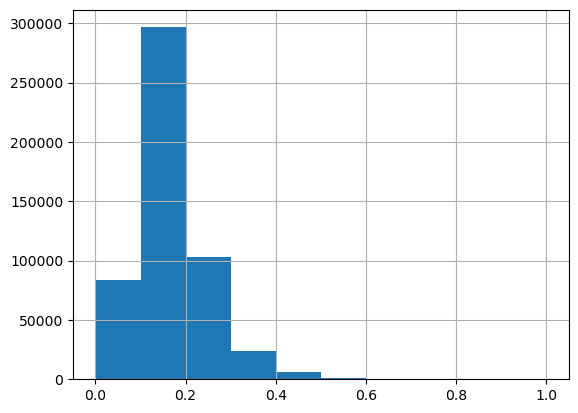

In [ ]:
ml.postcode_density.hist()

In [ ]:
ml[ml['postcode_density'] > 1 ][['postcode', 'clean_res_premise_area_total', 'area', 'postcode_density']]

,postcode,clean_res_premise_area_total,area,postcode_density
9036,TA6 7BB,5828.599903,4209.837439,1.384519
52595,CO5 7DU,3459.300049,3241.065487,1.067334
81703,BB9 5AJ,299.399994,270.728133,1.105906
118362,BB8 9BQ,173.900002,163.899879,1.061014
253432,W1G 6QR,486.400017,429.623159,1.132155
262578,SW7 1BH,768.299988,757.902039,1.013719
278943,CR0 2NJ,1186.799957,619.100064,1.916976
302101,GL53 0FB,612.800018,481.229471,1.273405
323514,GL52 7SR,1599.100037,1335.276816,1.197579
481689,SW20 8DH,964.599976,436.966939,2.207490


In [ ]:
fuel = load_proc_dir_log_file('/Volumes/T9/Data_downloads/new-data-outputs/proc_dir (2)/fuel')
fuel

,path,region,batch,len,memory
0,/Volumes/T9/Data_downloads/new-data-outputs/pr...,SW,4,10000,norm
1,/Volumes/T9/Data_downloads/new-data-outputs/pr...,SW,8,10000,norm
2,/Volumes/T9/Data_downloads/new-data-outputs/pr...,SW,11,10000,norm
3,/Volumes/T9/Data_downloads/new-data-outputs/pr...,SW,13,10000,norm
4,/Volumes/T9/Data_downloads/new-data-outputs/pr...,SW,6,10000,norm
...,...,...,...,...,...
163,/Volumes/T9/Data_downloads/new-data-outputs/pr...,NE,7,2638,norm
164,/Volumes/T9/Data_downloads/new-data-outputs/pr...,NE,1,10000,norm
165,/Volumes/T9/Data_downloads/new-data-outputs/pr...,NE,2,10000,norm
166,/Volumes/T9/Data_downloads/new-data-outputs/pr...,NE,0,10000,norm


In [ ]:
df = load_fromLog(fuel)
df, data = post_proc_new_fuel(df)

In [ ]:
import matplotlib.pyplot as plt 

In [ ]:
ml.total_gas.mean()

241193.1540404289

In [ ]:
ml.min_heated_vol.mean()

2877.78972334717

In [ ]:
ml.median_gas.mean()

10777.48757755584

<Axes: >

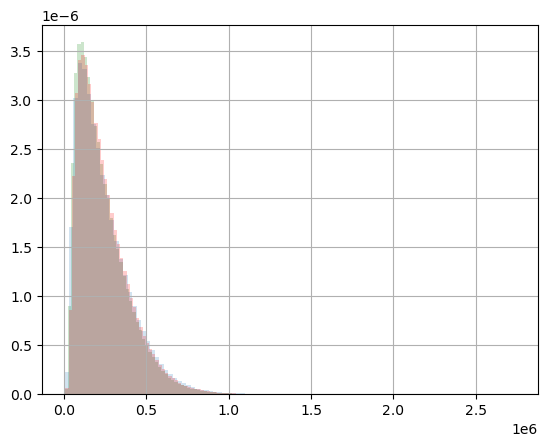

In [ ]:
f, ax = plt.subplots() 

data['total_gas'].hist(bins=100, ax=ax, color='g', alpha= 0.2, density=True )
all_gas['total_gas'].hist(bins=100, ax=ax, alpha=0.2, density=True )
ml['total_gas'].hist(bins=100, ax=ax, alpha=0.2, density=True, color='r'  )

In [ ]:
ml.columns.tolist()

['Unnamed: 0',
 'postcode',
 'all_types_total_buildings',
 'all_types_uprn_count_total',
 'comm_alltypes_count',
 'unknown_alltypes',
 'all_res_total_buildings',
 'all_res_premise_area_total',
 'all_res_gross_area_total',
 'all_res_heated_vol_fc_total',
 'all_res_heated_vol_h_total',
 'all_res_base_floor_total',
 'all_res_basement_heated_vol_max_total',
 'all_res_listed_bool_total',
 'all_res_uprn_count_total',
 'clean_res_total_buildings',
 'clean_res_premise_area_total',
 'clean_res_gross_area_total',
 'clean_res_heated_vol_fc_total',
 'clean_res_heated_vol_h_total',
 'clean_res_base_floor_total',
 'clean_res_basement_heated_vol_max_total',
 'clean_res_listed_bool_total',
 'clean_res_uprn_count_total',
 'outb_res_total_buildings',
 'outb_res_premise_area_total',
 'outb_res_gross_area_total',
 'outb_res_heated_vol_fc_total',
 'outb_res_heated_vol_h_total',
 'outb_res_base_floor_total',
 'outb_res_basement_heated_vol_max_total',
 'outb_res_listed_bool_total',
 'outb_res_uprn_count_tota

In [ ]:
ml['min_av_gas'] =  ml['total_gas'] / ml['max_heated_vol']
ml['max_av_gas'] = ml['total_gas'] / ml['min_heated_vol']

In [ ]:
ml.total_gas.mean()

241193.1540404289

In [ ]:
 ml.total_gas.mean()/  ml.min_av_gas.mean()

2966.598042896578

In [ ]:
 ml.total_gas.mean() /   ml.max_av_gas.mean()

2776.065196859808

In [ ]:
ml.min_av_gas.mean(),  ml.max_av_gas.mean(), 

(81.30294382751246, 86.8831014175238)

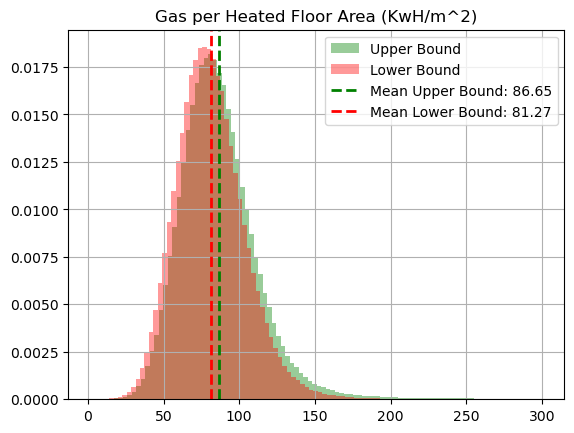

In [ ]:
import matplotlib.pyplot as plt

# Create the plot
f, ax = plt.subplots()

# Filter and copy the data
data = ml[ml['max_av_gas'] < 300].copy()

# Plot the histograms
data.max_av_gas.hist(bins=100, ax=ax, color='g', label='Upper Bound', alpha=0.4, density=True)
data.min_av_gas.hist(bins=100, ax=ax, color='r', label='Lower Bound', alpha=0.4, density=True)

# Calculate the means
mean_max_av_gas = data.max_av_gas.mean()
mean_min_av_gas = data.min_av_gas.mean()

# Plot mean lines
ax.axvline(mean_max_av_gas, color='g', linestyle='dashed', linewidth=2, label=f'Mean Upper Bound: {mean_max_av_gas:.2f}')
ax.axvline(mean_min_av_gas, color='r', linestyle='dashed', linewidth=2, label=f'Mean Lower Bound: {mean_min_av_gas:.2f}')

# Add legend and title
ax.legend()
ax.set_title('Gas per Heated Floor Area (KwH/m^2)')

# Show the plot
plt.show()


In [ ]:
data.columns.tolist()

['postcode',
 'all_types_total_buildings',
 'all_types_uprn_count_total',
 'comm_alltypes_count',
 'unknown_alltypes',
 'all_res_total_buildings',
 'all_res_premise_area_total',
 'all_res_gross_area_total',
 'all_res_heated_vol_fc_total',
 'all_res_heated_vol_h_total',
 'all_res_base_floor_total',
 'all_res_basement_heated_vol_max_total',
 'all_res_listed_bool_total',
 'all_res_uprn_count_total',
 'clean_res_total_buildings',
 'clean_res_premise_area_total',
 'clean_res_gross_area_total',
 'clean_res_heated_vol_fc_total',
 'clean_res_heated_vol_h_total',
 'clean_res_base_floor_total',
 'clean_res_basement_heated_vol_max_total',
 'clean_res_listed_bool_total',
 'clean_res_uprn_count_total',
 'outb_res_total_buildings',
 'outb_res_premise_area_total',
 'outb_res_gross_area_total',
 'outb_res_heated_vol_fc_total',
 'outb_res_heated_vol_h_total',
 'outb_res_base_floor_total',
 'outb_res_basement_heated_vol_max_total',
 'outb_res_listed_bool_total',
 'outb_res_uprn_count_total',
 'mixed_tot

In [ ]:
data.max_vol_per_uprn.describe()

count    6.755680e+05
mean              inf
std               NaN
min      2.550180e+00
25%      1.035919e+02
50%      1.258899e+02
75%      1.688912e+02
max               inf
Name: max_vol_per_uprn, dtype: float64

/var/folders/n5/_2d3c5sd5j3810327mknn0sh0000gn/T/ipykernel_44805/160812850.py:7: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  ml[ml[col]<1000].hist(bins=bins, ax=ax, alpha=0.5, density=True, color='r'  )
/Users/gracecolverd/miniconda3/envs/xarr/lib/python3.12/site-packages/numpy/lib/histograms.py:885: RuntimeWarning: invalid value encountered in divide
  return n/db/n.sum(), bin_edges


array([[<Axes: title={'center': 'Unnamed: 0'}>,
        <Axes: title={'center': 'all_types_total_buildings'}>,
        <Axes: title={'center': 'all_types_uprn_count_total'}>,
        <Axes: title={'center': 'comm_alltypes_count'}>,
        <Axes: title={'center': 'unknown_alltypes'}>,
        <Axes: title={'center': 'all_res_total_buildings'}>,
        <Axes: title={'center': 'all_res_premise_area_total'}>,
        <Axes: title={'center': 'all_res_gross_area_total'}>,
        <Axes: title={'center': 'all_res_heated_vol_fc_total'}>,
        <Axes: title={'center': 'all_res_heated_vol_h_total'}>,
        <Axes: title={'center': 'all_res_base_floor_total'}>],
       [<Axes: title={'center': 'all_res_basement_heated_vol_max_total'}>,
        <Axes: title={'center': 'all_res_listed_bool_total'}>,
        <Axes: title={'center': 'all_res_uprn_count_total'}>,
        <Axes: title={'center': 'clean_res_total_buildings'}>,
        <Axes: title={'center': 'clean_res_premise_area_total'}>,
      

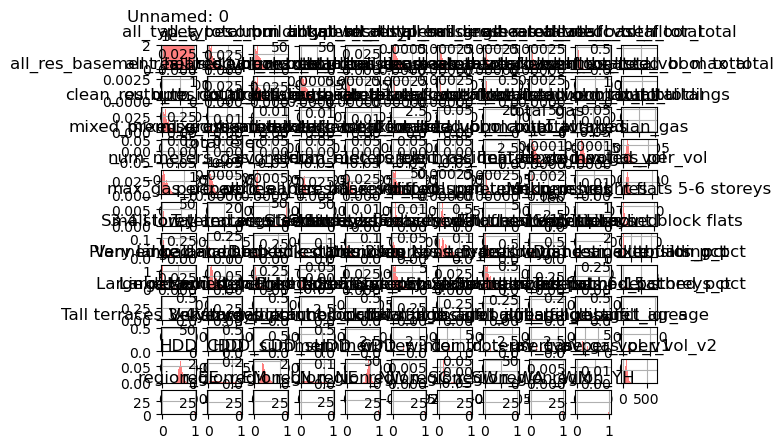

In [ ]:
col = 'max_vol_per_uprn'
bins = 50 
f, ax = plt.subplots() 


data[data[col]<1000][col].hist(bins=bins, ax=ax, color='g', alpha= 0.5, density=True )
ml[ml[col]<1000].hist(bins=bins, ax=ax, alpha=0.5, density=True, color='r'  )

In [ ]:
all_gas = df[~df['total_gas'].isna()].copy() 

<Axes: >

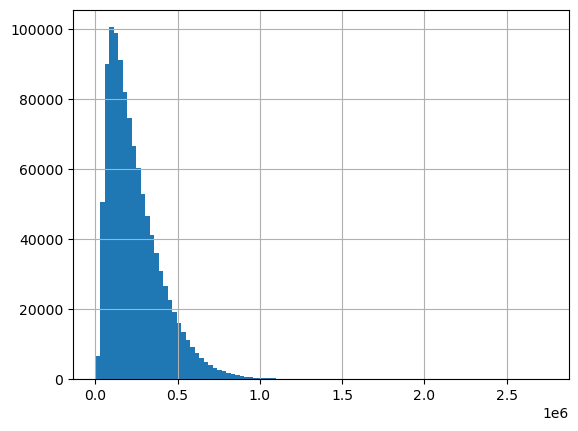

In [ ]:
ml = pd.read_csv('/Volumes/T9/Data_downloads/new-data-outputs/ml_input/V3_ml_input_data.csv')

/var/folders/n5/_2d3c5sd5j3810327mknn0sh0000gn/T/ipykernel_44805/394943711.py:1: DtypeWarning: Columns (141) have mixed types. Specify dtype option on import or set low_memory=False.
  ml = pd.read_csv('/Volumes/T9/Data_downloads/new-data-outputs/ml_input/V3_ml_input_data.csv')


In [ ]:
df

,Unnamed: 0,postcode,all_types_total_buildings,all_types_uprn_count_total,comm_alltypes_count,unknown_alltypes,all_res_total_buildings,all_res_premise_area_total,all_res_gross_area_total,all_res_heated_vol_fc_total,...,region_EE,region_EM,region_LN,region_NE,region_NW,region_SC,region_SW,region_WA,region_WM,region_YH
0,0,PL6 7LP,46.0,27.0,0.0,0.0,46.0,2730.499987,5577.799982,5577.799971,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,1,PL4 9PS,22.0,23.0,0.0,0.0,22.0,1391.699991,2777.499994,2777.499979,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,2,PL1 3DT,2.0,18.0,0.0,0.0,2.0,788.899979,3155.599915,3155.599915,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,3,PL4 8PB,2.0,12.0,0.0,0.0,2.0,331.000000,772.299988,772.300003,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,4,PL4 8PE,19.0,23.0,0.0,0.0,19.0,739.699988,2223.800025,2223.799963,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515304,515304,W8 7NU,11.0,10.0,0.0,0.0,11.0,534.799999,1069.599998,1069.599998,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
515305,515305,W8 5AJ,7.0,13.0,0.0,0.0,7.0,385.499992,1414.999962,1414.999969,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
515306,515306,W8 7AY,7.0,44.0,0.0,0.0,7.0,588.099995,2870.999969,3528.599968,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
515307,515307,W8 7BA,5.0,5.0,0.0,0.0,5.0,268.099995,804.300018,804.299984,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
df.columns.tolist() 

['Unnamed: 0',
 'postcode',
 'all_types_total_buildings',
 'all_types_uprn_count_total',
 'comm_alltypes_count',
 'unknown_alltypes',
 'all_res_total_buildings',
 'all_res_premise_area_total',
 'all_res_gross_area_total',
 'all_res_heated_vol_fc_total',
 'all_res_heated_vol_h_total',
 'all_res_base_floor_total',
 'all_res_basement_heated_vol_max_total',
 'all_res_listed_bool_total',
 'all_res_uprn_count_total',
 'clean_res_total_buildings',
 'clean_res_premise_area_total',
 'clean_res_gross_area_total',
 'clean_res_heated_vol_fc_total',
 'clean_res_heated_vol_h_total',
 'clean_res_base_floor_total',
 'clean_res_basement_heated_vol_max_total',
 'clean_res_listed_bool_total',
 'clean_res_uprn_count_total',
 'outb_res_total_buildings',
 'outb_res_premise_area_total',
 'outb_res_gross_area_total',
 'outb_res_heated_vol_fc_total',
 'outb_res_heated_vol_h_total',
 'outb_res_base_floor_total',
 'outb_res_basement_heated_vol_max_total',
 'outb_res_listed_bool_total',
 'outb_res_uprn_count_tota

In [ ]:
import pandas as pd 
fp = pd.read_csv('/Volumes/T9/Data_downloads/fuel_poverty/fuelpoverty.csv')

In [ ]:
fp

,OrganisationLabel,OrganisationURI,PublishedDate,DurationFrom,DurationTo,LatestData,ReportingPeriodType,GeoEntityName,GeoCode,GeoName,GeoURI,Year,EstimatedNumberOfHouseholds,EstimatedNumberOfFuelPoorHouseholds,PercentageOfHouseholdsFuelPoor
0,Lincolnshire,http://opendatacommunities.org/id/county-counc...,2023-04-27T00:00:00,2021-01-01T00:00:00,2021-12-31T23:59:59,True,Calendar Year,County,E10000019,Lincolnshire,http://statistics.data.gov.uk/doc/statistical-...,2021,339562,47114,13.9
1,Lincolnshire,http://opendatacommunities.org/id/county-counc...,2023-04-27T00:00:00,2021-01-01T00:00:00,2021-12-31T23:59:59,True,Calendar Year,District Council,E07000136,Boston,http://statistics.data.gov.uk/doc/statistical-...,2021,29917,4340,14.5
2,Lincolnshire,http://opendatacommunities.org/id/county-counc...,2023-04-27T00:00:00,2021-01-01T00:00:00,2021-12-31T23:59:59,True,Calendar Year,District Council,E07000137,East Lindsey,http://statistics.data.gov.uk/doc/statistical-...,2021,65996,10744,16.3
3,Lincolnshire,http://opendatacommunities.org/id/county-counc...,2023-04-27T00:00:00,2021-01-01T00:00:00,2021-12-31T23:59:59,True,Calendar Year,District Council,E07000138,Lincoln,http://statistics.data.gov.uk/doc/statistical-...,2021,43256,6783,15.7
4,Lincolnshire,http://opendatacommunities.org/id/county-counc...,2023-04-27T00:00:00,2021-01-01T00:00:00,2021-12-31T23:59:59,True,Calendar Year,District Council,E07000139,North Kesteven,http://statistics.data.gov.uk/doc/statistical-...,2021,51871,5924,11.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
438,Lincolnshire,http://opendatacommunities.org/id/county-counc...,2023-04-27T00:00:00,2021-01-01T00:00:00,2021-12-31T23:59:59,True,Calendar Year,Lower Super Output Area (LSOA),E01026366,West Lindsey 011A,http://statistics.data.gov.uk/doc/statistical-...,2021,1093,169,15.5
439,Lincolnshire,http://opendatacommunities.org/id/county-counc...,2023-04-27T00:00:00,2021-01-01T00:00:00,2021-12-31T23:59:59,True,Calendar Year,Lower Super Output Area (LSOA),E01026369,West Lindsey 011B,http://statistics.data.gov.uk/doc/statistical-...,2021,603,78,12.9
440,Lincolnshire,http://opendatacommunities.org/id/county-counc...,2023-04-27T00:00:00,2021-01-01T00:00:00,2021-12-31T23:59:59,True,Calendar Year,Lower Super Output Area (LSOA),E01026370,West Lindsey 011C,http://statistics.data.gov.uk/doc/statistical-...,2021,1177,86,7.3
441,Lincolnshire,http://opendatacommunities.org/id/county-counc...,2023-04-27T00:00:00,2021-01-01T00:00:00,2021-12-31T23:59:59,True,Calendar Year,Lower Super Output Area (LSOA),E01026371,West Lindsey 011D,http://statistics.data.gov.uk/doc/statistical-...,2021,539,62,11.5


/var/folders/n5/_2d3c5sd5j3810327mknn0sh0000gn/T/ipykernel_23752/2738763796.py:1: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  lk= pd.read_csv('/Volumes/T9/Data_downloads/lookups/pcs_to_oa_mapping_census2021/PCD_OA21_LSOA21_MSOA21_LAD_AUG23_UK_LU.csv', encoding='latin1')


In [ ]:
lk.head()

,pcd7,pcd8,pcds,dointr,doterm,usertype,oa21cd,lsoa21cd,msoa21cd,ladcd,lsoa21nm,msoa21nm,ladnm,ladnmw
0,AB1 0AA,AB1 0AA,AB1 0AA,198001,199606.0,0,S00090303,S01006514,S02001237,S12000033,NaN,NaN,Aberdeen City,NaN
1,AB1 0AB,AB1 0AB,AB1 0AB,198001,199606.0,0,S00090303,S01006514,S02001237,S12000033,NaN,NaN,Aberdeen City,NaN
2,AB1 0AD,AB1 0AD,AB1 0AD,198001,199606.0,0,S00090399,S01006514,S02001237,S12000033,NaN,NaN,Aberdeen City,NaN
3,AB1 0AE,AB1 0AE,AB1 0AE,199402,199606.0,0,S00091322,S01006853,S02001296,S12000034,NaN,NaN,Aberdeenshire,NaN
4,AB1 0AF,AB1 0AF,AB1 0AF,199012,199207.0,1,S00090299,S01006511,S02001236,S12000033,NaN,NaN,Aberdeen City,NaN


In [ ]:
import sys 
sys.path.append('/Users/gracecolverd/New_dataset')
from src.utils import join_pc_map_three_pc

In [ ]:
data = join_pc_map_three_pc(df, 'postcode', lk)

In [ ]:
data.head()

,Unnamed: 0,postcode,all_types_total_buildings,all_types_uprn_count_total,comm_alltypes_count,unknown_alltypes,all_res_total_buildings,all_res_premise_area_total,all_res_gross_area_total,all_res_heated_vol_fc_total,...,LatestData,ReportingPeriodType,GeoEntityName,GeoCode,GeoName,GeoURI,Year,EstimatedNumberOfHouseholds,EstimatedNumberOfFuelPoorHouseholds,PercentageOfHouseholdsFuelPoor
0,24855,LN4 3YF,7.0,12.0,0.0,0.0,7.0,917.500008,1835.000015,1835.000015,...,True,Calendar Year,Lower Super Output Area (LSOA),E01026179,North Kesteven 008A,http://statistics.data.gov.uk/doc/statistical-...,2021,422,59,14.0
1,24856,LN4 3YD,8.0,19.0,0.0,0.0,8.0,1374.500000,2749.000000,2749.000000,...,True,Calendar Year,Lower Super Output Area (LSOA),E01026179,North Kesteven 008A,http://statistics.data.gov.uk/doc/statistical-...,2021,422,59,14.0
2,24857,LN4 3LN,3.0,17.0,0.0,0.0,3.0,854.099991,1708.199982,1708.199982,...,True,Calendar Year,Lower Super Output Area (LSOA),E01026179,North Kesteven 008A,http://statistics.data.gov.uk/doc/statistical-...,2021,422,59,14.0
3,24858,LN4 3LL,6.0,13.0,0.0,0.0,6.0,706.800007,1499.899990,1499.900021,...,True,Calendar Year,Lower Super Output Area (LSOA),E01026179,North Kesteven 008A,http://statistics.data.gov.uk/doc/statistical-...,2021,422,59,14.0
4,25084,LN4 3YB,12.0,24.0,0.0,0.0,12.0,1836.600021,3673.200043,3673.200043,...,True,Calendar Year,Lower Super Output Area (LSOA),E01026179,North Kesteven 008A,http://statistics.data.gov.uk/doc/statistical-...,2021,422,59,14.0


In [ ]:
data = data.merge(fp , left_on = 'lsoa21cd', right_on = 'GeoCode')

In [ ]:
data.columns.tolist() 

['Unnamed: 0',
 'postcode',
 'all_types_total_buildings',
 'all_types_uprn_count_total',
 'comm_alltypes_count',
 'unknown_alltypes',
 'all_res_total_buildings',
 'all_res_premise_area_total',
 'all_res_gross_area_total',
 'all_res_heated_vol_fc_total',
 'all_res_heated_vol_h_total',
 'all_res_base_floor_total',
 'all_res_basement_heated_vol_max_total',
 'all_res_listed_bool_total',
 'all_res_uprn_count_total',
 'clean_res_total_buildings',
 'clean_res_premise_area_total',
 'clean_res_gross_area_total',
 'clean_res_heated_vol_fc_total',
 'clean_res_heated_vol_h_total',
 'clean_res_base_floor_total',
 'clean_res_basement_heated_vol_max_total',
 'clean_res_listed_bool_total',
 'clean_res_uprn_count_total',
 'outb_res_total_buildings',
 'outb_res_premise_area_total',
 'outb_res_gross_area_total',
 'outb_res_heated_vol_fc_total',
 'outb_res_heated_vol_h_total',
 'outb_res_base_floor_total',
 'outb_res_basement_heated_vol_max_total',
 'outb_res_listed_bool_total',
 'outb_res_uprn_count_tota

In [ ]:
data.to_csv('Lincolnshire_fuel_porveryt_data.csv')

In [ ]:
data.columns.tolist()

['Unnamed: 0',
 'postcode',
 'all_types_total_buildings',
 'all_types_uprn_count_total',
 'comm_alltypes_count',
 'unknown_alltypes',
 'all_res_total_buildings',
 'all_res_premise_area_total',
 'all_res_gross_area_total',
 'all_res_heated_vol_fc_total',
 'all_res_heated_vol_h_total',
 'all_res_base_floor_total',
 'all_res_basement_heated_vol_max_total',
 'all_res_listed_bool_total',
 'all_res_uprn_count_total',
 'clean_res_total_buildings',
 'clean_res_premise_area_total',
 'clean_res_gross_area_total',
 'clean_res_heated_vol_fc_total',
 'clean_res_heated_vol_h_total',
 'clean_res_base_floor_total',
 'clean_res_basement_heated_vol_max_total',
 'clean_res_listed_bool_total',
 'clean_res_uprn_count_total',
 'outb_res_total_buildings',
 'outb_res_premise_area_total',
 'outb_res_gross_area_total',
 'outb_res_heated_vol_fc_total',
 'outb_res_heated_vol_h_total',
 'outb_res_base_floor_total',
 'outb_res_basement_heated_vol_max_total',
 'outb_res_listed_bool_total',
 'outb_res_uprn_count_tota

In [ ]:
data['max_vol_per_uprn'].describe()


count    6716.000000
mean      153.239062
std        58.978838
min        39.398886
25%       108.476026
50%       139.176549
75%       187.929694
max       576.016816
Name: max_vol_per_uprn, dtype: float64

<AxesSubplot: >

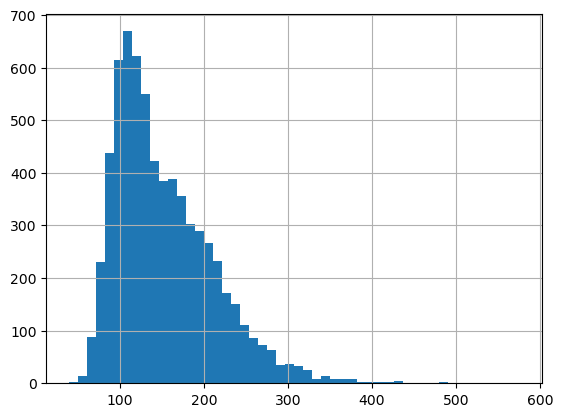

In [ ]:
data.max_vol_per_uprn.hist(bins=50)

In [ ]:
data.min_vol_per_uprn.mean()

147.92801722879906

In [ ]:
lower_hal